# Anomalies Detection  

In [1]:
# Install the missing packages
%pip install pandas matplotlib yfinance seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


data gathereation 

In [2]:
ticker='GME'
start_date = "2020-01-01"
end_date = "2023-12-31"
gme_data=yf.download(ticker,start_date,end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
gme_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GME,GME,GME,GME,GME
Date,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600


In [4]:
gme_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, GME)   1006 non-null   float64
 1   (High, GME)    1006 non-null   float64
 2   (Low, GME)     1006 non-null   float64
 3   (Open, GME)    1006 non-null   float64
 4   (Volume, GME)  1006 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB


# ploting the close price 

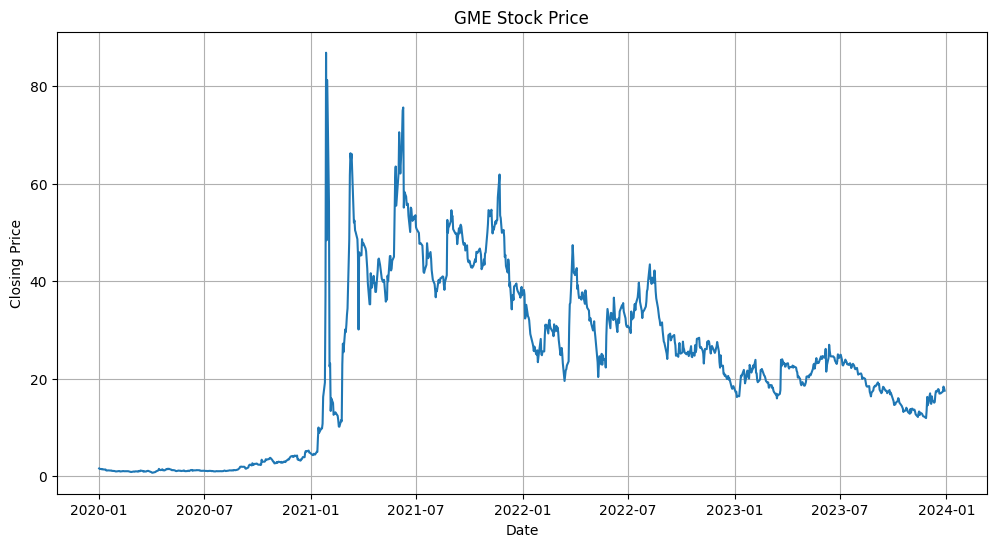

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(gme_data.index, gme_data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


# EDA

## CALCURATE RETURN 

In [6]:
gme_data['Returns']=gme_data['Close'].pct_change()

In [7]:
gme_data.head()

Price,Close,High,Low,Open,Volume,Returns
Ticker,GME,GME,GME,GME,GME,
Date,,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400,NaN
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600,-0.068146
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200,-0.005102
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000,-0.056410
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600,0.036232


### calculating volality 

In [8]:
gme_data['Volatility']=gme_data['Returns'].rolling(window=20).std()

# ploting the price change volality and return 

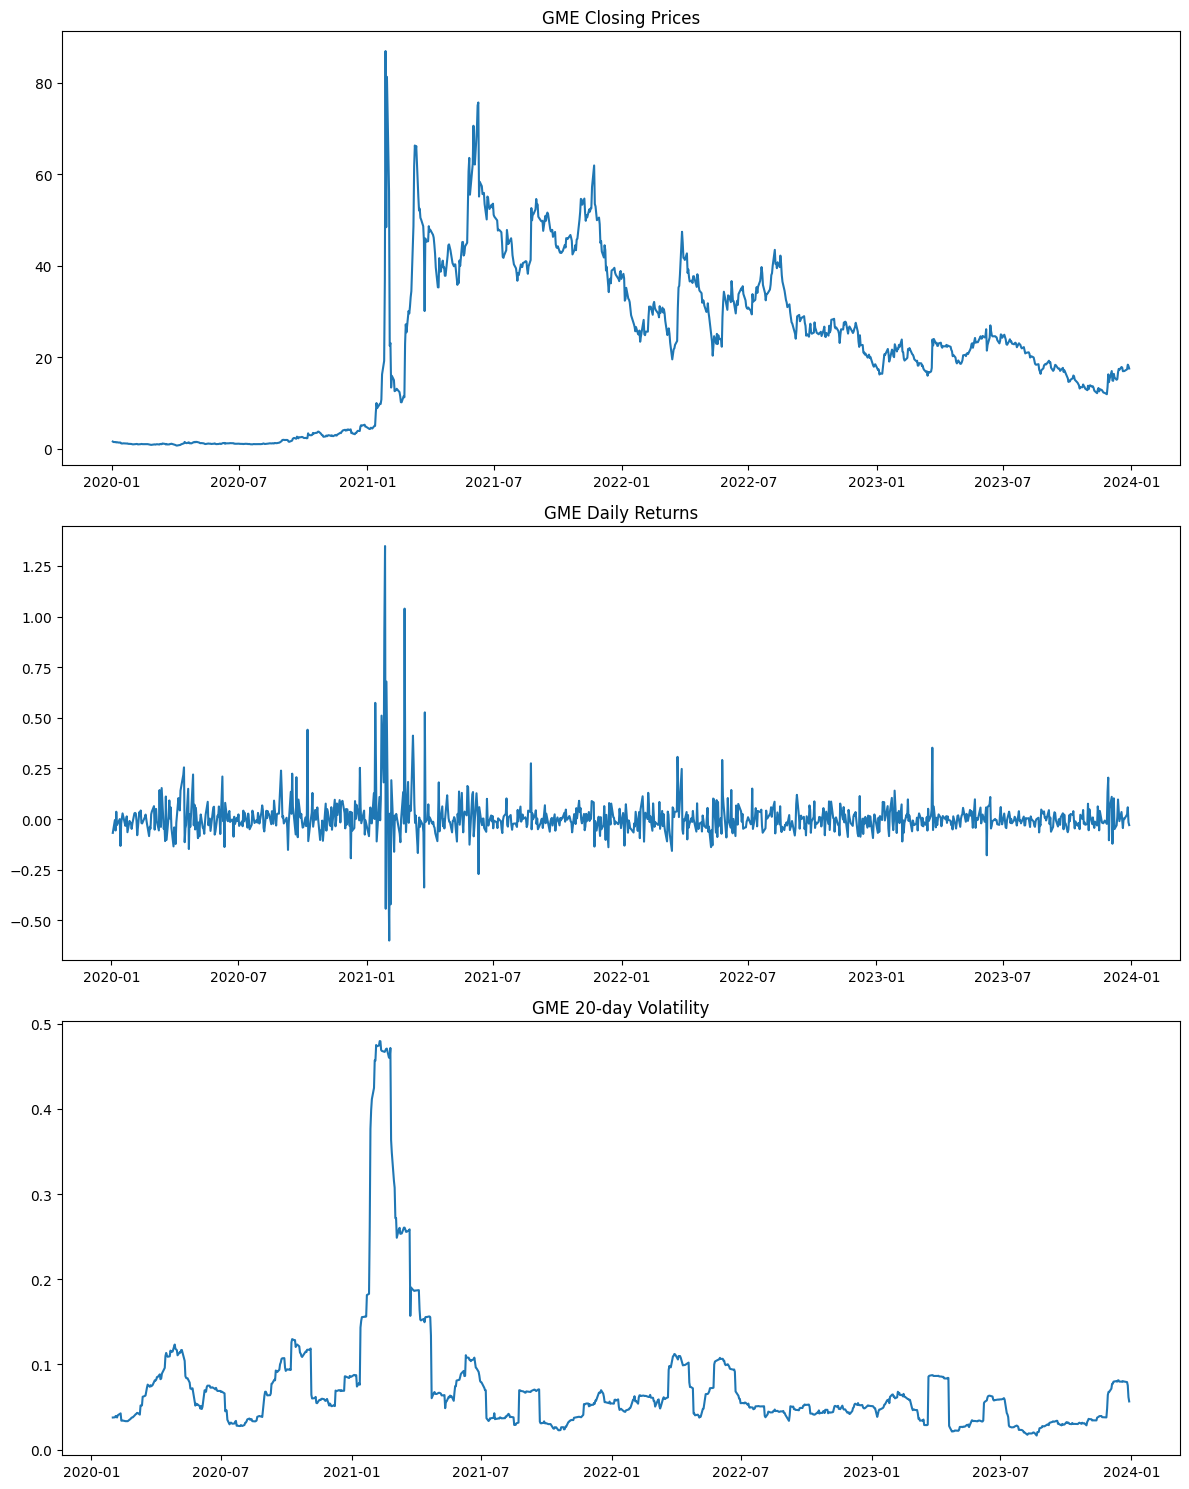

In [9]:
fig,axes=plt.subplots(3,1,figsize=(12,15))
axes[0].plot(gme_data.index, gme_data['Close'])
axes[0].set_title('GME Closing Prices')
axes[1].plot(gme_data.index, gme_data['Returns'])
axes[1].set_title('GME Daily Returns')
axes[2].plot(gme_data.index, gme_data['Volatility'])
axes[2].set_title('GME 20-day Volatility')
plt.tight_layout()

plt.show()

# Feature Engineering

simple moving average 

In [10]:
gme_data.head()

Price,Close,High,Low,Open,Volume,Returns,Volatility
Ticker,GME,GME,GME,GME,GME,,
Date,,,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400,NaN,NaN
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600,-0.068146,NaN
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200,-0.005102,NaN
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000,-0.056410,NaN
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600,0.036232,NaN


In [11]:
gme_data['SMA_10']=gme_data['Close'].rolling(window=10).mean()
gme_data['SMA_20']=gme_data['Close'].rolling(window=20).mean()

In [12]:
gme_data.head()

Price,Close,High,Low,Open,Volume,Returns,Volatility,SMA_10,SMA_20
Ticker,GME,GME,GME,GME,GME,,,,
Date,,,,,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400,NaN,NaN,NaN,NaN
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600,-0.068146,NaN,NaN,NaN
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200,-0.005102,NaN,NaN,NaN
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000,-0.056410,NaN,NaN,NaN
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600,0.036232,NaN,NaN,NaN


In [13]:
gme_data['SMA_50'] = gme_data['Close'].rolling(window=50).mean()

In [14]:
def calculate_rsi(data,periods=14):
    delta=data.diff()
    gain=(delta.where(delta>0,0)).rolling(window=periods).mean()
    loss=(-delta.where(delta<0,0)).rolling(window=periods).mean()
    rs=gain/loss
    return 100-(100/(1+rs))
gme_data['RSI']=calculate_rsi(gme_data['Close'])

In [15]:
gme_data.head()

Price,Close,High,Low,Open,Volume,Returns,Volatility,SMA_10,SMA_20,SMA_50,RSI
Ticker,GME,GME,GME,GME,GME,,,,,,
Date,,,,,,,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600,-0.068146,NaN,NaN,NaN,NaN,NaN
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200,-0.005102,NaN,NaN,NaN,NaN,NaN
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000,-0.056410,NaN,NaN,NaN,NaN,NaN
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600,0.036232,NaN,NaN,NaN,NaN,NaN


# Bollinger Bands

In [16]:
gme_data['Upper_BB'] = gme_data['SMA_20'] + (gme_data['Close'].rolling(window=20).std().squeeze() * 2)
gme_data['Lower_BB'] = gme_data['SMA_20'] - (gme_data['Close'].rolling(window=20).std().squeeze() * 2)


# plot tecnical analysis 

In [17]:
# Install the missing package
%pip install plotly

import nbformat
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add 'Close' price line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['Close'],
    mode='lines',
    name='Close',
    line=dict(color='blue', width=2)
))

# Add 'SMA 10' line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['SMA_10'],
    mode='lines',
    name='SMA 10',
    line=dict(color='green', width=2, dash='dot')
))

# Add 'SMA 50' line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['SMA_50'],
    mode='lines',
    name='SMA 50',
    line=dict(color='orange', width=2, dash='dash')
))

# Add 'Upper BB' line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['Upper_BB'],
    mode='lines',
    name='Upper BB',
    line=dict(color='red', width=1, dash='dot')
))

# Add 'Lower BB' line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['Lower_BB'],
    mode='lines',
    name='Lower BB',
    line=dict(color='purple', width=1, dash='dot')
))

# Update layout for a larger figure size and title
fig.update_layout(
    title='GME Stock Price with Technical Indicators',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    legend=dict(x=0, y=1, bgcolor='rgba(255,255,255,0)', bordercolor='rgba(255,255,255,0)'),
    autosize=False,
    width=1200,
    height=600,
   
)

# Show the plot
fig.show()



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Anomaly Detection Techniques

## stats mode 

# apllying z score model 


In [18]:
# Install the missing package
%pip install scipy

from scipy import stats


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
gme_data['Close_Z_Score']=stats.zscore(gme_data['Close'])
anomlies_zscore=gme_data[abs(gme_data['Close_Z_Score'])>3]


In [20]:
anomlies_zscore

Price,Close,High,Low,Open,Volume,Returns,Volatility,SMA_10,SMA_20,SMA_50,RSI,Upper_BB,Lower_BB,Close_Z_Score
Ticker,GME,GME,GME,GME,GME,,,,,,,,,
Date,,,,,,,,,,,,,,
2021-01-27,86.877502,95.000000,62.250000,88.707497,373586800,1.348358,0.376478,21.64025,13.146625,7.52745,98.434327,51.142634,-24.849384,3.765734
2021-01-29,81.250000,103.495003,62.500000,94.927498,202264400,0.678719,0.411380,32.82250,19.146125,10.00510,74.607241,69.157106,-30.864856,3.432680
2021-06-08,75.000000,86.165001,70.250000,73.000000,69756400,0.071390,0.086401,63.64825,52.743125,46.10415,71.693999,77.468195,28.018055,3.062784
2021-06-09,75.639999,82.000000,72.877502,75.779999,53717200,0.008533,0.086649,65.97650,54.688625,46.71045,75.160866,80.218630,29.158620,3.100662


In [21]:
import plotly.graph_objects as go
from scipy import stats

# Calculate Z-Score for 'Close' prices
gme_data['Close_Z_Score'] = stats.zscore(gme_data['Close'])

# Identify anomalies where Z-Score > 3 or < -3
anomalies_zscore = gme_data[abs(gme_data['Close_Z_Score']) > 3]

# Create the figure
fig = go.Figure()

# Add 'Close' price line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['Close'],
    mode='lines',
    name='Close Price',
    line=dict(color='blue', width=2)
))

# Add anomalies (Z-score > 3 or < -3) as red markers
fig.add_trace(go.Scatter(
    x=anomalies_zscore.index,
    y=anomalies_zscore['Close'],
    mode='markers',
    name='Anomalies (Z-Score)',
    marker=dict(color='red', size=8, symbol='circle'),
    showlegend=True
))

# Update layout for a larger figure size and title
fig.update_layout(
    title='GME Stock Price with Anomalies Detected Using Z-Score',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    autosize=False,
    width=1200,
    height=600,
    
)

# Show the plot
fig.show()


# machine learing methods 

# isolation forest  approch 

In [22]:
# Install the missing packages
%pip install scikit-learn statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
gme_data[['Close','Volume','Returns','Volatility']].isna().sum()

Price       Ticker
Close       GME        0
Volume      GME        0
Returns                1
Volatility            20
dtype: int64

In [24]:
print(gme_data.columns)


MultiIndex([(        'Close', 'GME'),
            (         'High', 'GME'),
            (          'Low', 'GME'),
            (         'Open', 'GME'),
            (       'Volume', 'GME'),
            (      'Returns',    ''),
            (   'Volatility',    ''),
            (       'SMA_10',    ''),
            (       'SMA_20',    ''),
            (       'SMA_50',    ''),
            (          'RSI',    ''),
            (     'Upper_BB',    ''),
            (     'Lower_BB',    ''),
            ('Close_Z_Score',    '')],
           names=['Price', 'Ticker'])


In [25]:
gme_data = gme_data.dropna(subset=[('Close', 'GME'), ('Volume', 'GME'), ('Returns', ''), ('Volatility', '')])

In [26]:
scaler=StandardScaler()
X=scaler.fit_transform(gme_data[['Close','Volume','Returns','Volatility']])
iso_forest=IsolationForest(contamination=0.01, random_state=42)
gme_data['Anomaly_IsoForest']=iso_forest.fit_predict(X)


In [27]:
anomalies_iso = gme_data[gme_data['Anomaly_IsoForest'] == -1]

In [28]:
anomalies_iso

Price,Close,High,Low,Open,Volume,Returns,Volatility,SMA_10,SMA_20,SMA_50,RSI,Upper_BB,Lower_BB,Close_Z_Score,Anomaly_IsoForest
Ticker,GME,GME,GME,GME,GME,,,,,,,,,,
Date,,,,,,,,,,,,,,,
2021-01-13,7.850000,9.662500,5.007500,5.105000,578006800,0.573935,0.143319,4.95350,4.654750,3.86645,77.638890,6.516281,2.793219,-0.911376,-1
2021-01-22,16.252501,19.190001,10.580000,10.647500,788631600,0.510807,0.181463,8.77275,6.764500,4.83595,88.481412,13.147844,0.381156,-0.414088,-1
2021-01-26,36.994999,37.500000,20.049999,22.139999,714352000,0.927074,0.261270,13.45125,9.065125,5.84555,96.233627,24.628512,-6.498262,0.813522,-1
2021-01-27,86.877502,95.000000,62.250000,88.707497,373586800,1.348358,0.376478,21.64025,13.146625,7.52745,98.434327,51.142634,-24.849384,3.765734,-1
2021-01-28,48.400002,120.750000,28.062500,66.250000,235263200,-0.442894,0.398567,25.69525,15.324375,8.44040,67.786065,56.200545,-25.551794,1.488508,-1
2021-01-29,81.250000,103.495003,62.500000,94.927498,202264400,0.678719,0.411380,32.82250,19.146125,10.00510,74.607241,69.157106,-30.864856,3.432680,-1
2021-02-02,22.500000,39.500000,18.555000,35.189999,312732400,-0.600000,0.456885,38.82600,22.632500,11.46410,54.086121,74.129313,-28.864312,-0.044340,-1
2021-02-04,13.375000,22.875000,13.332500,22.797501,249709200,-0.421058,0.474927,40.42000,24.009750,12.06780,50.773451,74.239869,-26.220369,-0.584388,-1


In [29]:
fig = go.Figure()

# Add Close price line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['Close'],
    mode='lines',
    name='Close Price',
    line=dict(color='blue', width=2)
))

# Add anomalies (Isolation Forest) as red markers
fig.add_trace(go.Scatter(
    x=anomalies_iso.index,
    y=anomalies_iso['Close'],
    mode='markers',
    name='Anomalies (Isolation Forest)',
    marker=dict(color='red', size=8, symbol='circle'),
    showlegend=True
))

# Update layout for a larger figure size and title
fig.update_layout(
    title='GME Stock Price with Anomalies Detected Using Isolation Forest',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    autosize=False,
    width=1200,
    height=600,
   
)

# Show the plot
fig.show()

# DBSCAN

In [30]:
dbscan=DBSCAN(eps=0.5,min_samples=5)
gme_data['Anomaly_DBSCAN'] = dbscan.fit_predict(X)

In [31]:
gme_data['Color'] = gme_data['Anomaly_DBSCAN'].apply(lambda x: 'red' if x == -1 else 'blue')


In [32]:
import plotly.express as px
fig = px.scatter(
    gme_data,
    x=('Close', 'GME'),
    y=('Volume', 'GME'),
    color=('Color', ''),
    title='DBSCAN Clustering Results on GME Data',
    labels={('Color', ''): 'Cluster'},
    hover_data=[('Returns', ''), ('Volatility', '')],
)


# Update layout for better visualization
fig.update_layout(
    xaxis_title='Close Price',
    yaxis_title='Volume',
    legend_title='Cluster',
    autosize=False,
    width=1200,
    height=600,
)

# Show the plot
fig.show()



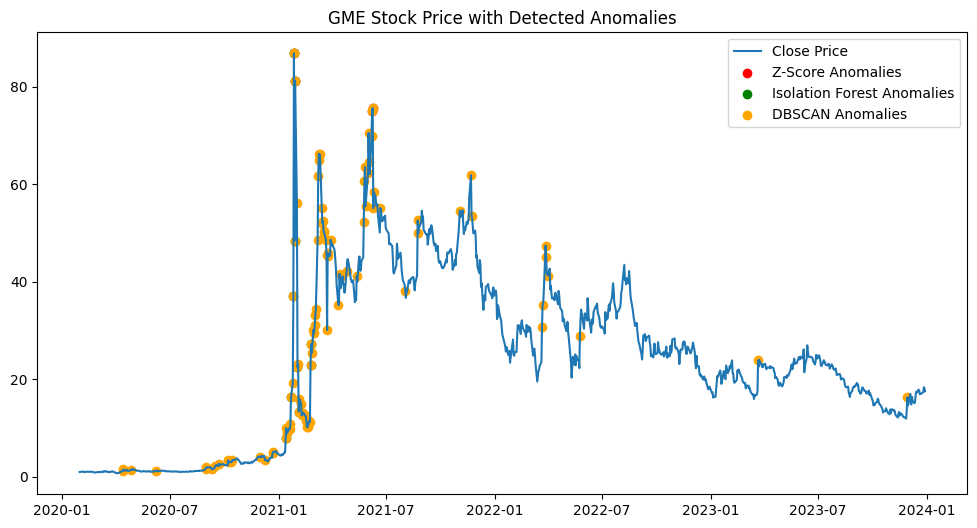

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(gme_data.index, gme_data['Close'], label='Close Price')
plt.scatter(anomalies_zscore.index, anomalies_zscore['Close'], color='red', label='Z-Score Anomalies')
plt.scatter(gme_data[gme_data['Anomaly_IsoForest'] == -1].index, 
            gme_data[gme_data['Anomaly_IsoForest'] == -1]['Close'], 
            color='green', label='Isolation Forest Anomalies')
plt.scatter(gme_data[gme_data['Anomaly_DBSCAN'] == -1].index, 
            gme_data[gme_data['Anomaly_DBSCAN'] == -1]['Close'], 
            color='orange', label='DBSCAN Anomalies')
plt.title('GME Stock Price with Detected Anomalies')
plt.legend()
plt.show()

In [34]:
import plotly.graph_objects as go


fig = go.Figure()

# Add the line for the closing price
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['Close'],
    mode='lines',
    name='Close Price',
    line=dict(color='blue'),
))

# Add the scatter plot for Z-Score anomalies
fig.add_trace(go.Scatter(
    x=anomalies_zscore.index,
    y=anomalies_zscore['Close'],
    mode='markers',
    name='Z-Score Anomalies',
    marker=dict(color='red', size=10),
))

# Add the scatter plot for Isolation Forest anomalies
fig.add_trace(go.Scatter(
    x=gme_data[gme_data['Anomaly_IsoForest'] == -1].index,
    y=gme_data[gme_data['Anomaly_IsoForest'] == -1]['Close'],
    mode='markers',
    name='Isolation Forest Anomalies',
    marker=dict(color='green', size=10),
))

# Add the scatter plot for DBSCAN anomalies
fig.add_trace(go.Scatter(
    x=gme_data[gme_data['Anomaly_DBSCAN'] == -1].index,
    y=gme_data[gme_data['Anomaly_DBSCAN'] == -1]['Close'],
    mode='markers',
    name='DBSCAN Anomalies',
    marker=dict(color='orange', size=10),
))

# Update layout
fig.update_layout(
    title='GME Stock Price with Detected Anomalies',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Legend',
    width=1200,
    height=600,
)

# Show the plot
fig.show()


In [35]:
print("Number of Z-Score Anomalies:", len(anomalies_zscore))
print("Number of Isolation Forest Anomalies:", sum(gme_data['Anomaly_IsoForest'] == -1))
print("Number of DBSCAN Anomalies:", sum(gme_data['Anomaly_DBSCAN'] == -1))

Number of Z-Score Anomalies: 4
Number of Isolation Forest Anomalies: 10
Number of DBSCAN Anomalies: 101


# Advance deep learning model 

# Lstm 

In [36]:
# Install the missing package
%pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


2025-03-23 13:56:55.853041: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
# lstm data prepreation 
from tensorflow.keras.callbacks import EarlyStopping
sequence_length=20
features=['Close', 'Volume', 'Returns', 'Volatility']
def create_sequence(data,sequence_length):
    X=[]
    Y=[]
    for i in range(len(data)-sequence_length):
        X.append(data[i:(i+sequence_length)])
    return np.array(X), np.array(y)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(gme_data[features])    

In [47]:
X,y=create_sequence(normalized_data,sequence_length)

In [48]:
def create_sequence(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])  # This is the label that comes right after the sequence
    return np.array(X), np.array(y)


In [42]:
# spliting the data 

In [49]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [50]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
    Dense(len(features))
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

/usr/local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1.3997 - val_loss: 0.1783
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0093 - val_loss: 0.1765
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9660 - val_loss: 0.1549
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9412 - val_loss: 0.1448
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8693 - val_loss: 0.1391
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7567 - val_loss: 0.1433
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.7029 - val_loss: 0.1359
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6357 - val_loss: 0.1305
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6095 - val_loss: 0.1345
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5709 - val_loss: 0.1270
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5671 - val_loss: 0.1352
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5

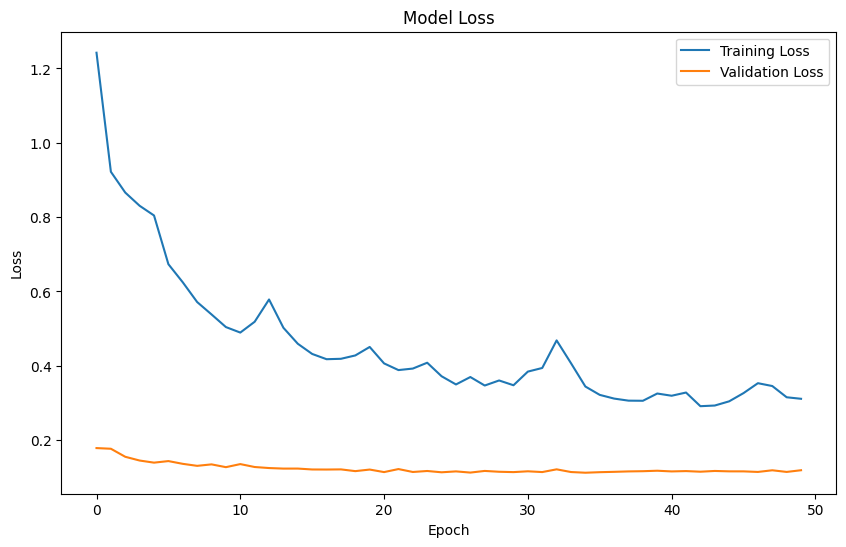

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [52]:
y_pred=model.predict(X_test)
mse=np.mean(np.power(y_test-y_pred,2),axis=1)
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


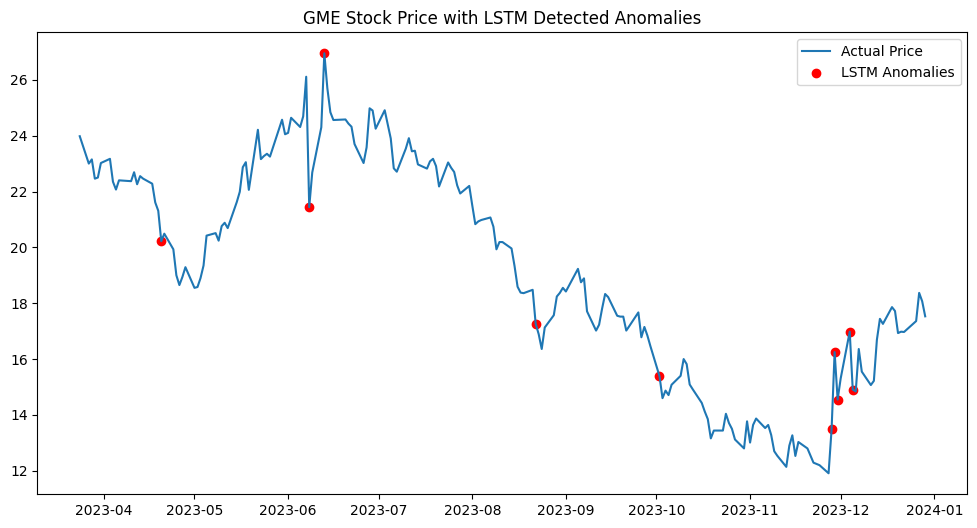

Number of LSTM Detected Anomalies: 10


In [53]:
plt.figure(figsize=(12, 6))
plt.plot(gme_data.index[train_size+sequence_length:], gme_data['Close'][train_size+sequence_length:], label='Actual Price')
plt.scatter(gme_data.index[train_size+sequence_length:][anomalies], 
            gme_data['Close'][train_size+sequence_length:][anomalies], 
            color='red', label='LSTM Anomalies')
plt.title('GME Stock Price with LSTM Detected Anomalies')
plt.legend()
plt.show()

# Print summary of LSTM anomalies
print(f"Number of LSTM Detected Anomalies: {sum(anomalies)}")

In [54]:
y_pred=model.predict(X_test)
mse=np.mean(np.power(y_test-y_pred,2),axis=1)
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


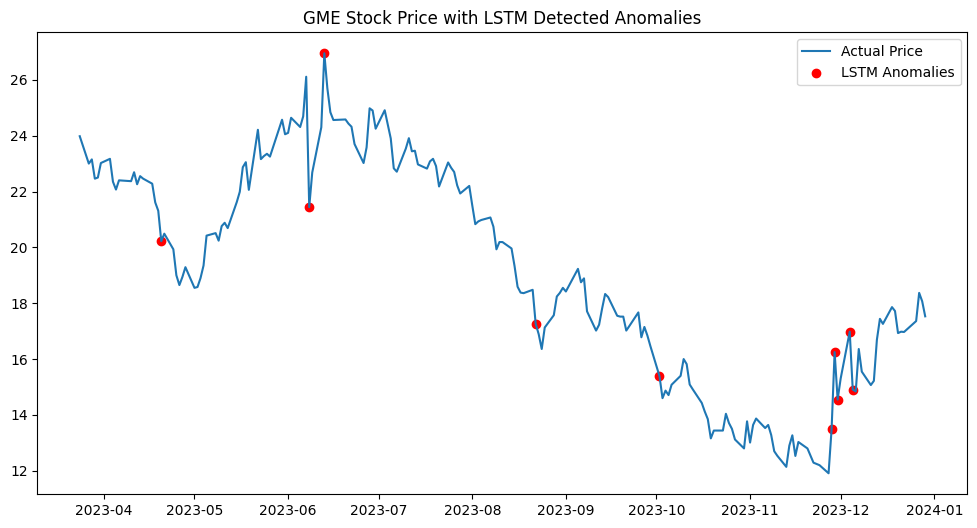

Number of LSTM Detected Anomalies: 10


In [55]:
plt.figure(figsize=(12, 6))
plt.plot(gme_data.index[train_size+sequence_length:], gme_data['Close'][train_size+sequence_length:], label='Actual Price')
plt.scatter(gme_data.index[train_size+sequence_length:][anomalies], 
            gme_data['Close'][train_size+sequence_length:][anomalies], 
            color='red', label='LSTM Anomalies')
plt.title('GME Stock Price with LSTM Detected Anomalies')
plt.legend()
plt.show()

# Print summary of LSTM anomalies
print(f"Number of LSTM Detected Anomalies: {sum(anomalies)}")

# autoEncoder

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [57]:
# Prepare the data
features = ['Close', 'Volume', 'Returns', 'Volatility']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gme_data[features])


In [58]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [59]:
input_dim = scaled_data.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(8, activation="relu")(input_layer)
encoder = Dense(4, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)
decoder = Dense(4, activation="relu")(encoder)
decoder = Dense(8, activation="relu")(decoder)
decoder = Dense(input_dim, activation="linear")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [60]:
history = autoencoder.fit(
    train_data, train_data,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.2375 - val_loss: 0.1450
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6690 - val_loss: 0.1504
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.3191 - val_loss: 0.1569
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3583 - val_loss: 0.1689
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6949 - val_loss: 0.1850
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4883 - val_loss: 0.2019
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1377 - val_loss: 0.1996
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1758 - val_loss: 0.1965
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3095 - val_loss: 0.1906
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1169 - val_loss: 0.1944
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1599 - val_loss: 0.1977
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss:

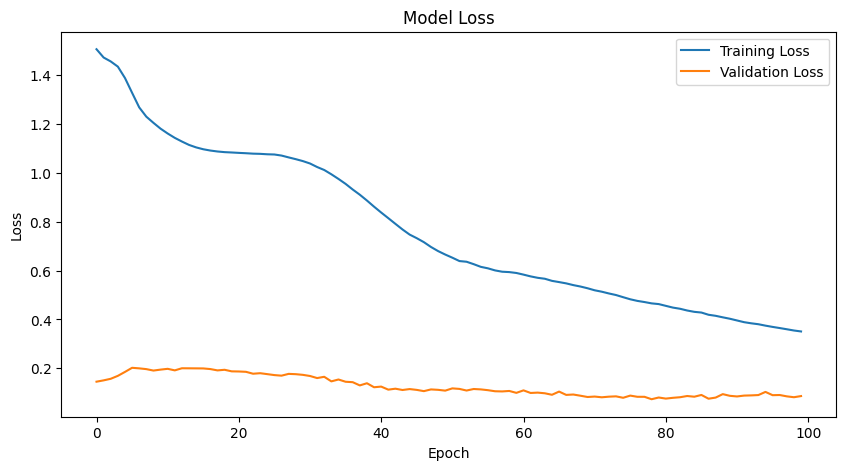

In [61]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [62]:
# Predict on the entire dataset
predictions = autoencoder.predict(scaled_data)
mse = np.mean(np.power(scaled_data - predictions, 2), axis=1)

# Define threshold for anomalies (e.g., 95th percentile of MSE)
threshold = np.percentile(mse, 95)

# Detect anomalies
anomalies = mse > threshold

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [285]:
#anomalies

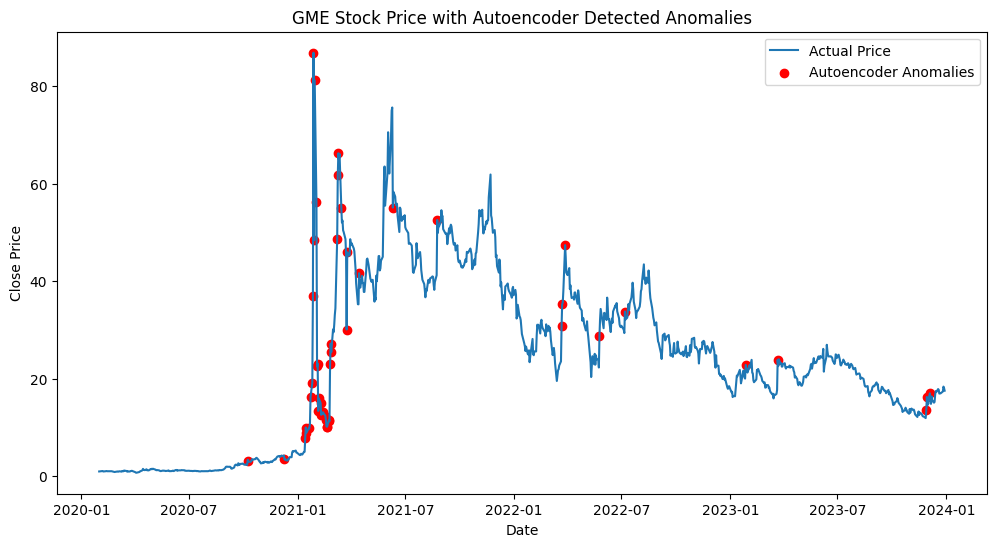

Number of Autoencoder Detected Anomalies: 50


In [63]:
plt.figure(figsize=(12, 6))
plt.plot(gme_data.index, gme_data['Close'], label='Actual Price')
plt.scatter(gme_data.index[anomalies], 
            gme_data.loc[anomalies, 'Close'], 
            color='red', label='Autoencoder Anomalies')
plt.title('GME Stock Price with Autoencoder Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print summary of Autoencoder anomalies
print(f"Number of Autoencoder Detected Anomalies: {sum(anomalies)}")

In [64]:
gme_data_copy = gme_data.copy()

# Add Anomaly_Autoencoder column
gme_data_copy['Anomaly_Autoencoder'] = anomalies.astype(int)

# Update the combined anomaly column
gme_data_copy['Combined_Anomaly'] = ((abs(gme_data_copy['Close_Z_Score']) > 3) | 
                                     (gme_data_copy['Anomaly_IsoForest'] == -1) | 
                                     (gme_data_copy['Anomaly_DBSCAN'] == -1) |
                                     (gme_data_copy['Anomaly_Autoencoder'] == 1)).astype(int)

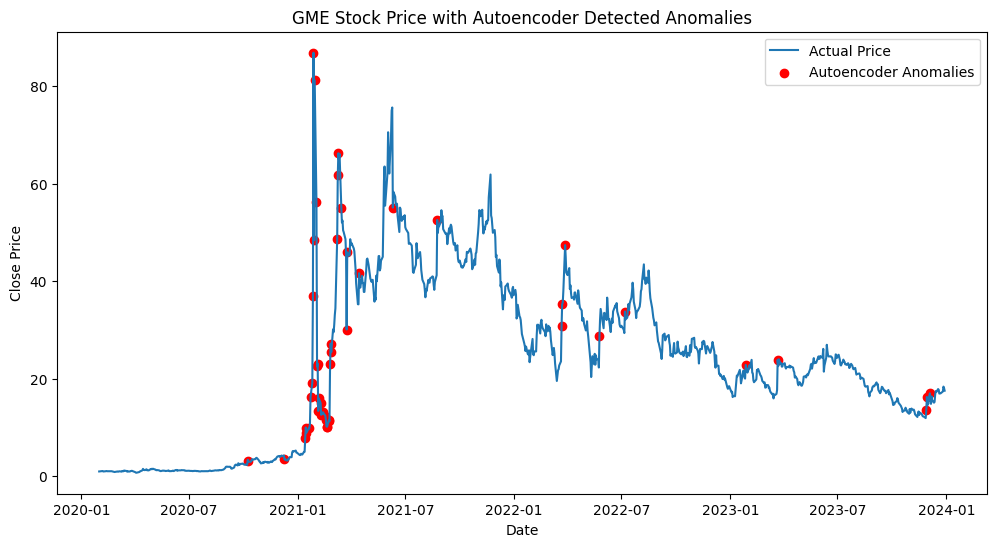

Number of Autoencoder Detected Anomalies: 50

Performance metrics for Autoencoder:
Precision: 1.0000
Recall: 0.4762
F1-Score: 0.6452


In [65]:
plt.figure(figsize=(12, 6))
plt.plot(gme_data_copy.index, gme_data_copy['Close'], label='Actual Price')
plt.scatter(gme_data_copy.index[anomalies], 
            gme_data_copy.loc[anomalies, 'Close'], 
            color='red', label='Autoencoder Anomalies')
plt.title('GME Stock Price with Autoencoder Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print summary of Autoencoder anomalies
print(f"Number of Autoencoder Detected Anomalies: {sum(anomalies)}")

# Calculate performance metrics for Autoencoder
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(gme_data_copy['Combined_Anomaly'], gme_data_copy['Anomaly_Autoencoder'])
recall = recall_score(gme_data_copy['Combined_Anomaly'], gme_data_copy['Anomaly_Autoencoder'])
f1 = f1_score(gme_data_copy['Combined_Anomaly'], gme_data_copy['Anomaly_Autoencoder'])

print("\nPerformance metrics for Autoencoder:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

In [67]:
print(gme_data.columns)


MultiIndex([(            'Close', 'GME'),
            (             'High', 'GME'),
            (              'Low', 'GME'),
            (             'Open', 'GME'),
            (           'Volume', 'GME'),
            (          'Returns',    ''),
            (       'Volatility',    ''),
            (           'SMA_10',    ''),
            (           'SMA_20',    ''),
            (           'SMA_50',    ''),
            (              'RSI',    ''),
            (         'Upper_BB',    ''),
            (         'Lower_BB',    ''),
            (    'Close_Z_Score',    ''),
            ('Anomaly_IsoForest',    ''),
            (   'Anomaly_DBSCAN',    ''),
            (            'Color',    '')],
           names=['Price', 'Ticker'])


In [68]:
gme_data[('Combined_Anomaly', '')] = (
    gme_data[('Anomaly_IsoForest', '')] | gme_data[('Anomaly_DBSCAN', '')]
).astype(int)

In [70]:
gme_data[('Anomaly_Autoencoder', '')] = autoencoder_predictions


NameError: name 'autoencoder_predictions' is not defined

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(
    gme_data[('Combined_Anomaly', '')],
    gme_data[('Anomaly_Autoencoder', '')]
)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Autoencoder')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


KeyError: ('Anomaly_Autoencoder', '')

In [ ]:
methods = ['Z_Score', 'IsoForest', 'DBSCAN', 'Autoencoder']
results = []

for method in methods:
    if method == 'Z_Score':
        predictions = (abs(gme_data['Close_Z_Score']) > 3).astype(int)
    elif method == 'IsoForest':
        predictions = (gme_data['Anomaly_IsoForest'] == -1).astype(int)
    elif method == 'DBSCAN':
        predictions = (gme_data['Anomaly_DBSCAN'] == -1).astype(int)
    else:  # Autoencoder
        predictions = gme_data['Anomaly_Autoencoder']
    
    precision = precision_score(gme_data['Combined_Anomaly'], predictions)
    recall = recall_score(gme_data['Combined_Anomaly'], predictions)
    f1 = f1_score(gme_data['Combined_Anomaly'], predictions)
    
    results.append({
        'Method': method,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

results_df = pd.DataFrame(results)
print("\nComparison of all methods:")
print(results_df)

In [301]:
autoencoder_results = {
    'Method': 'Autoencoder',
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
autoencoder_df = pd.DataFrame([autoencoder_results])
results_df = pd.concat([results_df, autoencoder_df], ignore_index=True)



In [ ]:
results_df = pd.DataFrame(results)
print("\nComparison of all methods:")
print(results_df)

# Visualize the comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(methods))
width = 0.25

plt.bar(x - width, results_df['Precision'], width, label='Precision')
plt.bar(x, results_df['Recall'], width, label='Recall')
plt.bar(x + width, results_df['F1-Score'], width, label='F1-Score')

plt.xlabel('Methods')
plt.ylabel('Scores')
plt.title('Comparison of Anomaly Detection Methods')
plt.xticks(x, methods)
plt.legend()
plt.show()